In [2]:
import nltk
#already downloaded stopwords from nltk.download()

In [3]:
import pandas as pd

In [5]:
data = pd.read_csv('yelp.csv')

In [6]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [8]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [12]:
data.groupby('stars').describe()

cool                                                 funny            \
        count      mean       std  min  25%  50%  75%   max   count      mean   
stars                                                                           
1       749.0  0.576769  1.474759  0.0  0.0  0.0  1.0  17.0   749.0  1.056075   
2       927.0  0.719525  1.491182  0.0  0.0  0.0  1.0  14.0   927.0  0.875944   
3      1461.0  0.788501  1.602576  0.0  0.0  0.0  1.0  18.0  1461.0  0.694730   
4      3526.0  0.954623  2.034367  0.0  0.0  0.0  1.0  38.0  3526.0  0.670448   
5      3337.0  0.944261  2.484583  0.0  0.0  0.0  1.0  77.0  3337.0  0.608631   

       ...    length           useful                                          \
       ...       75%      max   count      mean       std  min  25%  50%  75%   
stars  ...                                                                      
1      ...   10000.0  10000.0   749.0  1.604806  2.302354  0.0  0.0  1.0  2.0   
2      ...   10000.0  10000.0   927.0  1.563107  1.969546  0.0  0.0  1.0  2.0   
3      ...   10000.0  10000.0  1461.0  1.306639  1.985327  0.0  0.0  1.0  2.0   
4      ...   10000.0  10000.0  3526.0  1.395916  2.236087  0.0  0.0  1.0  2.0   
5      ...   10000.0  10000.0  3337.0  1.381780  2.659065  0.0  0.0  1.0  2.0   

             
        max  
stars        
1      20.0  
2      17.0  
3      19.0  
4      38.0  
5      76.0  

[5 rows x 32 columns]

In [13]:
data['length'] = data['text'].apply(len)

In [15]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


Exploratory Data Annalysis

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

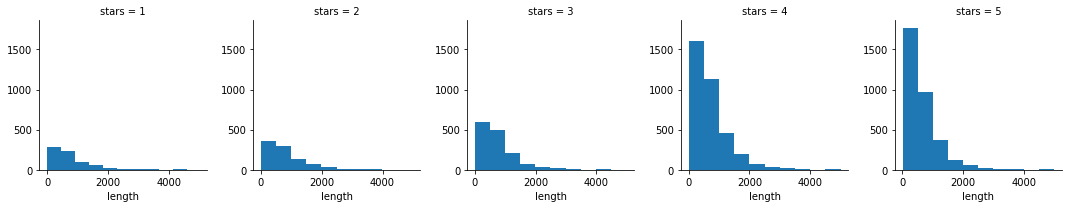

In [20]:
g = sns.FacetGrid(data,col='stars')
g.map(plt.hist,'length')

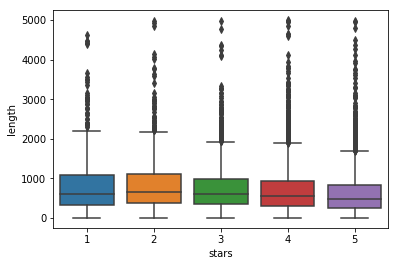

In [21]:
sns.boxplot(data=data,x='stars',y='length')

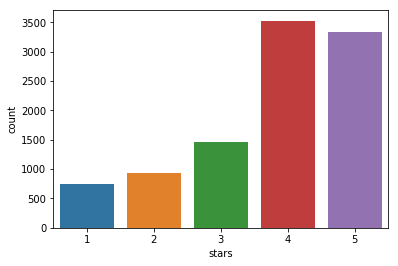

In [22]:
sns.countplot(data=data,x='stars')

In [25]:
stars = data.groupby('stars').mean()
stars

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [27]:
corr =  data.corr()
corr

,stars,cool,useful,funny,length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
length,-0.114674,0.241451,0.293975,0.251760,1.000000


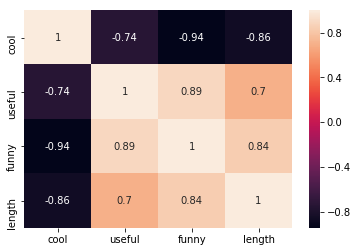

In [32]:
sns.heatmap(stars.corr(),annot=True)

In [34]:
# 1 or 5
yelp_class = data[(data['stars'] == 1) | (data['stars'] == 5)]

In [36]:
X = yelp_class['text']
y = yelp_class['stars']

In [43]:
print("Message: ",X[3])
print("Rate: ",y[3])

Message:  Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.

The Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.

The fenced in area is huge to let the dogs run, play, and sniff!
Rate:  5


In [44]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [46]:
X = cv.fit_transform(X)

In [49]:
#Train and Test of data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [51]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
predictions = nb.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [54]:
#Using tfidf
from sklearn.feature_extraction.text import  TfidfTransformer

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [57]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [58]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [59]:
predictions = pipeline.predict(X_test)

In [60]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
